In [1]:
import sys
sys.version

'3.6.0 |Anaconda 4.3.0 (64-bit)| (default, Dec 23 2016, 12:22:00) \n[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]'

In [93]:
import pandas as pd
import numpy as np
import prophet
from matplotlib import pyplot

from pandas import read_csv
from pandas import datetime

from pandas import Series
from matplotlib import pyplot

import plotly.plotly as py
import plotly.graph_objs as go

import plotly 
plotly.tools.set_credentials_file(username='giranntu', api_key='xJOJtkZv4AVss9yJMd**')

import cufflinks as cf

In [94]:
infile = './scripts/training_20min_avg_travel_time.csv'

             datetime        datetime_end intersection_id  tollgate_id  \
0 2016-07-19 00:00:00 2016-07-19 00:20:00               B            3   
1 2016-07-19 00:20:00 2016-07-19 00:40:00               B            3   
2 2016-07-19 01:40:00 2016-07-19 02:00:00               B            3   
3 2016-07-19 02:00:00 2016-07-19 02:20:00               B            3   
4 2016-07-19 02:40:00 2016-07-19 03:00:00               B            3   

   avg_travel_time  
0            70.85  
1           148.79  
2            93.72  
3            67.81  
4           167.55  


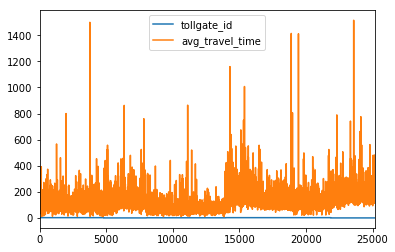

In [95]:
#dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

series = pd.read_csv(infile, parse_dates={'datetime': ['time_window_start'], 'datetime_end': ['time_window_end']}, date_parser=dateparse)

print(series.head())
# series = read_csv('./scripts/training_20min_avg_travel_time.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# print(series.head())
series.plot()
pyplot.show()

                               datetime        datetime_end  avg_travel_time
datetime                                                                    
2016-07-19 00:20:00 2016-07-19 00:20:00 2016-07-19 00:40:00            58.05
2016-07-19 01:20:00 2016-07-19 01:20:00 2016-07-19 01:40:00            56.87
2016-07-19 01:40:00 2016-07-19 01:40:00 2016-07-19 02:00:00            77.74
2016-07-19 02:20:00 2016-07-19 02:20:00 2016-07-19 02:40:00            42.64
2016-07-19 02:40:00 2016-07-19 02:40:00 2016-07-19 03:00:00            40.17


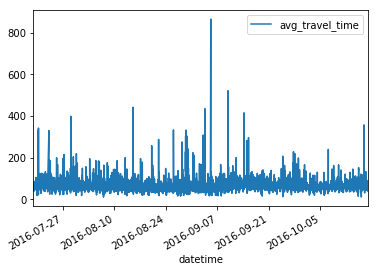

In [96]:
series_A2 = series[(series['intersection_id'] == 'A') & (series['tollgate_id'] == 2)]
series_A2_cut = series_A2[['datetime','datetime_end','avg_travel_time']]
series_A2_cut = series_A2_cut.set_index(series_A2_cut['datetime'])
print(series_A2_cut.head())
series_A2_cut.plot()
pyplot.show()

In [110]:
trace = go.Scatter( x=series_A2_cut['datetime'], y=series_A2_cut['avg_travel_time'] )
data = [trace]

high_annotations=[dict(x='2016-07-25',
                       y=series_A2_cut.avg_travel_time.mean(),
                       xref='x', yref='y',
                       text='High Average:<br>'+str(series_A2_cut.avg_travel_time.mean()),
                       ax=0, ay=-40),
                  dict(x=series_A2_cut.avg_travel_time.idxmax(),
                       y=series_A2_cut.avg_travel_time.max(),
                       xref='x', yref='y',
                       text='High Max:<br>'+str(series_A2_cut.avg_travel_time.max()),
                       ax=0, ay=-40)]
updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([   
            dict(label = 'High',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Yahoo High',
                          'annotations': high_annotations}])
        ]),
    )
])
# IPython notebook
layout = dict(title='series_A2-time-series', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='update_button')
#py.iplot(data, filename='pandas-time-series')

In [107]:
series_A2_cut.avg_travel_time.mean()

65.74282816429195

In [102]:
#series_A2_cut
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

#df = cf.datagen.lines()
series_A2_cut.head()
series_A2_cut.iplot(kind='scatter', filename='cufflinks/index-as-date')

,datetime,datetime_end,avg_travel_time
8009,2016-07-19 00:20:00,2016-07-19 00:40:00,58.05
8010,2016-07-19 01:20:00,2016-07-19 01:40:00,56.87
8011,2016-07-19 01:40:00,2016-07-19 02:00:00,77.74
8012,2016-07-19 02:20:00,2016-07-19 02:40:00,42.64
8013,2016-07-19 02:40:00,2016-07-19 03:00:00,40.17
8014,2016-07-19 03:20:00,2016-07-19 03:40:00,41.92
8015,2016-07-19 03:40:00,2016-07-19 04:00:00,39.43
8016,2016-07-19 04:00:00,2016-07-19 04:20:00,48.13
8017,2016-07-19 04:20:00,2016-07-19 04:40:00,62.11
8018,2016-07-19 04:40:00,2016-07-19 05:00:00,46.12


In [10]:
series

intersection_id
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
B    3
    ..
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
C    1
Name: tollgate_id, dtype: int64